# 종토방 본문 키워드 전처리 및 시각화

In [3]:
from cgitb import html
import re
import click
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from time import sleep 
import pandas as pd 

csv 파일 로드

In [18]:
kakao_df = pd.read_csv("C:/PYTHON/G_ML/해커톤/kakao_2206.csv") 
kakao_df 


,전체날짜,종목명,제목,본문
0,2022.06.01 05:23,카카오,이시간에 카카오메인이 조선이 싹쓸이하네...,메인 7개 뉴스중에 5개가 조선1개가 동아 1개가 듣보잡 인터넷언론....이러니 주...
1,2022.06.01 08:44,카카오,돈은 많이 받으면서,근무시간에 오디오라인 열어놓는게 불만이라니\n그냥 집에서 누워서 tv보면서 근무하고...
2,2022.06.01 08:59,카카오,유영두 할아버지 넘 실망이에요~~^^,"토른방에 남겨진 유영두 할아버지에 대한 댓글 입니다.\n""범수 똘마니 의심 ""\n""..."
3,2022.06.01 09:29,카카오,빡빡이 하는짓 보면 모르나,김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 먹을려고 하는거지\n\n카...
4,2022.06.01 09:37,카카오,한오백년 전쟁하자는 미필 양키괴뢰!!!,"우리는 원래 하나였으나, 미,소에 의해 강제로 분단 당했습니다.\n피눈물도 없다는 ..."
...,...,...,...,...
6615,2022.06.30 23:31,카카오,이거보고 윤석열이 왕따라고 생각하면,https://youtu.be/C2-HTUyE6Y4\n\n당신은 천재ㅋㅋㅋ 왕따 아...
6616,2022.06.30 23:34,카카오,잠이 안온다,내일 인버스에 얼마나 꽂힐지..돈복사
6617,2022.06.30 23:40,카카오,이거 액분전에 평균얼마엿어요,궁금합니다
6618,2022.06.30 23:52,카카오,나스닥 7천,간다.\n\n카카오는 3만 간다.\n\nㅋㅋ


텍스트 데이터 전처리

In [19]:
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거
# - re 모듈을 통해 정규표현식 사용 가능

def text_clening (text) : 
    hangul = re.compile('[^ ㄱ-ㅣ가-힇]+')   # 한글의 정규표현식
    result = hangul.sub('', text)
    return result

print(text_clening(kakao_df['본문'][0]))

메인 개 뉴스중에 개가 조선개가 동아 개가 듣보잡 인터넷언론이러니 주가가 이모양이지


In [20]:
# 모든 데이터에 전처리 적용하기 
#  - 각 피처마다 데이터 전처리 적용 = 함수 적용

kakao_df['제목'] = kakao_df['제목'].apply(lambda x : text_clening(x))
kakao_df['본문'] = kakao_df['본문'].apply(lambda x : text_clening(x))
kakao_df

,전체날짜,종목명,제목,본문
0,2022.06.01 05:23,카카오,이시간에 카카오메인이 조선이 싹쓸이하네,메인 개 뉴스중에 개가 조선개가 동아 개가 듣보잡 인터넷언론이러니 주가가 이모양이지
1,2022.06.01 08:44,카카오,돈은 많이 받으면서,근무시간에 오디오라인 열어놓는게 불만이라니그냥 집에서 누워서 보면서 근무하고 싶나보...
2,2022.06.01 08:59,카카오,유영두 할아버지 넘 실망이에요,토른방에 남겨진 유영두 할아버지에 대한 댓글 입니다범수 똘마니 의심 생긴것이 사기꾼...
3,2022.06.01 09:29,카카오,빡빡이 하는짓 보면 모르나,김범수가 일궈낸 자리 편하게 앉아서 메타버스 빌미로 날로 먹을려고 하는거지카카오 대...
4,2022.06.01 09:37,카카오,한오백년 전쟁하자는 미필 양키괴뢰,우리는 원래 하나였으나 미소에 의해 강제로 분단 당했습니다피눈물도 없다는 유태계 양...
...,...,...,...,...
6615,2022.06.30 23:31,카카오,이거보고 윤석열이 왕따라고 생각하면,당신은 천재ㅋㅋㅋ 왕따 아니라고 생각하면 당신은 왕따ㅋㅋ다들 파랑 남색 넥타이 했는...
6616,2022.06.30 23:34,카카오,잠이 안온다,내일 인버스에 얼마나 꽂지돈복사
6617,2022.06.30 23:40,카카오,이거 액분전에 평균얼마엿어요,궁금합니다
6618,2022.06.30 23:52,카카오,나스닥 천,간다카카오는 만 간다ㅋㅋ


In [7]:
kakao_df.drop(['Unnamed: 0'], axis=1, inplace= True)
kakao_df


KeyError: "['Unnamed: 0'] not found in axis"

말뭉치 만들기

In [21]:
# 피처별 말뭉치 생성하기

title_corpus = "".join(kakao_df['제목'].tolist())
text_corpus  = "".join(kakao_df['본문'].tolist())

# print(title_corpus)


키워드 추출하기

In [22]:
# konlpy 를 이용해서 키워드 추출

from konlpy.tag import Okt
from collections import Counter


In [23]:
# from collections import Counter
# from konlpy.tag import Okt

# 형태소 분석기로 명사 단위로 키워드 추출
#  - 제목
nouns_tagger = Okt()
nouns_title = nouns_tagger.nouns(title_corpus)
count_title = Counter(nouns_title)
count_title

Counter({'시간': 42,
         '카카오': 815,
         '메인': 2,
         '조선': 2,
         '싹': 3,
         '돈': 40,
         '유영': 68,
         '할아버지': 5,
         '실망': 1,
         '빡빡이': 2,
         '짓': 3,
         '한오': 1,
         '백년': 1,
         '전쟁': 17,
         '미필': 2,
         '양키': 4,
         '괴뢰': 1,
         '전라도': 5,
         '지주회사': 7,
         '반등': 50,
         '월': 38,
         '맞이': 1,
         '로써': 8,
         '버스': 7,
         '토큰': 1,
         '단어': 2,
         '대표': 35,
         '최저': 12,
         '시급': 4,
         '인증': 3,
         '교생': 1,
         '투표': 2,
         '폐지': 8,
         '요즘': 15,
         '고교생': 1,
         '청소년': 1,
         '로만': 1,
         '쭉': 5,
         '뒤통수': 4,
         '년차': 10,
         '주주': 58,
         '메타': 3,
         '근무': 5,
         '껍데기': 19,
         '회사': 73,
         '반토막': 22,
         '외국인': 27,
         '만천원': 11,
         '지선': 14,
         '긴급': 8,
         '속보': 16,
         '수익': 7,
         '창': 2,
         '쏭': 1,
 

### 형태소 분석기로 명사 단위로 키워드 추출

In [24]:
# 형태소 분석기로 명사 단위로 키워드 추출
#  - 본문
nouns_tagger = Okt()
nouns_text = nouns_tagger.nouns(text_corpus)
count_text = Counter(nouns_text)
count_text

Counter({'메인': 5,
         '개': 350,
         '뉴스': 47,
         '조선': 10,
         '동아': 2,
         '듣보잡': 1,
         '인터넷': 10,
         '언론': 17,
         '주가': 368,
         '모양': 23,
         '근무시간': 3,
         '오디오': 1,
         '라인': 18,
         '불만': 11,
         '그냥': 143,
         '집': 28,
         '근무': 23,
         '출근': 5,
         '반토막': 77,
         '성과급': 3,
         '월급': 22,
         '인상': 106,
         '꼬박꼬박': 1,
         '처': 76,
         '졸라': 10,
         '많네토른방': 1,
         '유영': 33,
         '할아버지': 14,
         '대한': 69,
         '댓글': 23,
         '범수': 62,
         '똘마': 1,
         '의심': 6,
         '사기꾼': 39,
         '영': 11,
         '방송': 58,
         '주식': 753,
         '면': 16,
         '실망': 4,
         '감': 22,
         '증말': 6,
         '사실': 58,
         '저': 86,
         '김범수': 60,
         '자리': 38,
         '메타': 34,
         '버스': 52,
         '미로': 3,
         '날로': 4,
         '카카오': 1543,
         '대표': 93,
         '빡빡이': 1,
         '

한 글자 키워드 제거

In [12]:
# 제목과 본문에 1 글자로 구성된 키워드 제거하기

remove_title_count = Counter({x : count_title[x] for x in count_title if len(x) > 1})
remove_text_count = Counter({x : count_text[x] for x in count_text if len(x) > 1})

print(remove_title_count)

Counter({'카카오': 815, '만원': 316, '오늘': 202, '주식': 194, '앵두': 145, '매수': 119, '주가': 107, '개미': 101, '공매도': 84, '하락': 83, '기업': 80, '평단': 75, '지금': 74, '회사': 73, '진짜': 72, '유영': 68, '사람': 68, '네이버': 64, '바닥': 64, '적정': 60, '주주': 58, '폭락': 57, '내일': 55, '반등': 50, '삭제': 49, '손절': 49, '간다': 48, '이제': 46, '매도': 45, '게시': 45, '물의': 44, '분할': 43, '상장': 43, '폭등': 43, '종가': 43, '종목': 43, '모빌리티': 43, '시간': 42, '시작': 42, '가격': 42, '코스피': 42, '생각': 41, '프로': 38, '나스닥': 38, '한국': 36, '증시': 36, '대표': 35, '목표': 35, '이유': 35, '월요일': 34, '탈출': 34, '답글': 34, '범수': 34, '쓰레기': 33, '어제': 31, '다시': 31, '윤석열': 31, '선물': 31, '기관': 30, '지수': 30, '거품': 30, '이상': 29, '매각': 29, '신용': 29, '투자': 29, '대통령': 28, '외국인': 27, '재앙': 27, '미국': 25, '금리': 25, '회장': 25, '코로나': 25, '상승': 24, '무조건': 24, '매매': 24, '페이': 23, '얼마': 23, '여기': 23, '공매': 23, '배당': 23, '반토막': 22, '정권': 22, '문재인': 22, '정말': 22, '시장': 22, '계속': 22, '토요일': 21, '세력': 21, '직원': 21, '사라': 21, '마지막': 21, '외인': 21, '금지': 21, '어디': 21, '경우': 20, '언제': 20, '차트':

키워드 다듬기 : 불용어 사전 이용

In [13]:
# 한국어 약식 불용어 사전 다운로드
# - https://www.ranks.nl/stopwords/korean
# - 텍스트 파일로 저장

korean_stopwors_path = "./korean_stopword.txt"

# 텍스트 파일 오픈
with open (korean_stopwors_path, encoding= 'utf8') as f : 
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

print(stopwords[:10])



['Korean Stopwords', '아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희']


In [14]:
# 불용어 사전 이외에 추가로 설정할 불용어 추가
kakao_stopwords = ['카카오', 'ㅋ', '년월']  ### 예시 단어임 : 키워드 확인해보고 단어 추가하기

for stopwords in kakao_stopwords : 
    stopwords.append(stopwords)


# 한글자 제거한 데이터에서 불용어 추가로 제거
remove_title_count = Counter({x : remove_title_count[x] for x in count_title if x not in stopwords})
remove_text_count = Counter({x : remove_text_count[x] for x in count_text if x not in stopwords})

print(remove_title_count)

AttributeError: 'str' object has no attribute 'append'

시각화

In [ ]:
# 워드클라우드 시각화 프로그램 설치
## cmd 창 혹은 터미널에서 실행 
# pip install wordcloud       

# pytagcloud 활용 : CDM에서 아래 순서대로 설치해주기
# pip install pygame
# pip install pytagcloud
# pip install simplejson

In [15]:
from wordcloud import WordCloud    # 워드클라우드 생성모듈
import matplotlib.pyplot as plt    # 워드클라우드 시각화
from collections import Counter
from konlpy.tag import Okt         # 한국어를 처리하는 대표적인 형태소 분석기
from PIL import Image              # 워드클라우드를 원하는 형태로 그리기위해 그림을 불러오는 패키지 
import numpy as np                 # 불러온 그림을 배열로 나타내어 쉽게 처리할 수 있도록 해줌

> 시각화 테스트 

In [16]:
with open('대한민국헌법.txt', 'r', encoding='utf-8') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

FileNotFoundError: [Errno 2] No such file or directory: '대한민국헌법.txt'

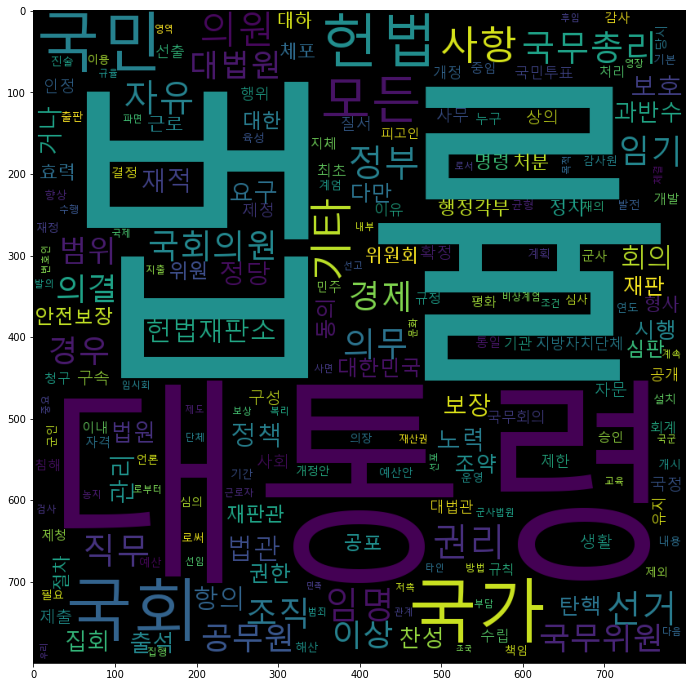

In [40]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(12, 12))
plt.imshow(gen)

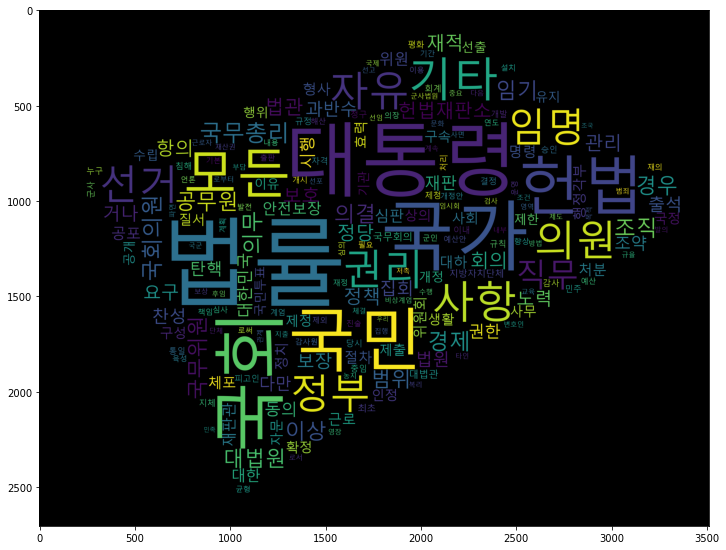

In [41]:
img = Image.open('book.jpg')
img_array = np.array(img)

wc = WordCloud(font_path='malgun', width=800, height=800, scale=2.0, max_font_size=250, mask=img_array)
gen = wc.generate_from_frequencies(c)

plt.figure(figsize= (12, 12))
plt.imshow(gen)

In [17]:
# 카카오 본문 데이터 시각화

img = Image.open('book.jpg')        # 이미지 파일 적용
img_array = np.array(img)

wc = WordCloud(font_path='malgun', width=800, height=800, scale=2.0, max_font_size=250, mask=img_array)
gen = wc.generate_from_frequencies(remove_text_count)         # () 안에 df 명 입력

plt.figure(figsize= (12, 12))
plt.imshow(gen)


FileNotFoundError: [Errno 2] No such file or directory: 'book.jpg'